In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)/TCGA.KIRC.sampleMap_KIRC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)/TCGA.KIRC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [3]:
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_KIRC,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_KIRC_mutation,_GENOMIC_ID_TCGA_KIRC_PDMarrayCNV,_GENOMIC_ID_TCGA_KIRC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_KIRC_PDMRNAseq,_GENOMIC_ID_TCGA_KIRC_miRNA_GA,_GENOMIC_ID_TCGA_KIRC_mutation_bcm_gene,_GENOMIC_ID_TCGA_KIRC_G4502A_07_3,_GENOMIC_ID_data/public/TCGA/KIRC/miRNA_GA_gene,_GENOMIC_ID_TCGA_KIRC_RPPA_RBN,_GENOMIC_ID_TCGA_KIRC_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,TCGA-3Z-A93Z-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-3Z-A93Z,...,NaN,NaN,c6075673-2b4f-45f2-b1e4-1d3356fce6aa,TCGA-3Z-A93Z-01,NaN,TCGA-3Z-A93Z-01A-11D-A36X-10,NaN,NaN,NaN,TCGA-3Z-A93Z-01
TCGA-6D-AA2E-01,TCGA-6D-AA2E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-6D-AA2E,...,NaN,NaN,31b392f4-0d9c-49f4-a82a-71589813f0ed,TCGA-6D-AA2E-01,NaN,TCGA-6D-AA2E-01A-11D-A36X-10,NaN,NaN,NaN,TCGA-6D-AA2E-01
TCGA-A3-3306-01,TCGA-A3-3306-01,Kirc+,C5-KIRC,KIRC-like c17,KIRC-like c1,KIRC-like c9,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,TCGA-A3-3306-01,cc6591d4-7d72-4556-a23b-ba82afba82e0,TCGA-A3-3306-01,NaN,NaN,TCGA-A3-3306-01A-01R-0864-07,NaN,TCGA-A3-3306-01A-02-1737-20,TCGA-A3-3306-01
TCGA-A3-3306-11,TCGA-A3-3306-11,NaN,C5-KIRC,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A3-3307-01,TCGA-A3-3307-01,Kirc+,NaN,NaN,NaN,KIRC-like c9,miRNA cluster 14,cluster 3,NaN,TCGA-A3-3307,...,NaN,TCGA-A3-3307-01,29eeeae4-a3c5-4008-a129-045485442021,TCGA-A3-3307-01,TCGA-A3-3307-01,NaN,TCGA-A3-3307-01A-01R-0864-07,TCGA-A3-3307-01,NaN,TCGA-A3-3307-01


In [4]:
gene_fullname = 'VHL gene'
gene = 'vhl'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Kidney Clear Cell Carcinoma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 111 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-BP-4162-01,0.639008,-0.026426,3.272565,-0.339672,0.450122,0.63619,-0.196794,0.414654,-0.423399,-1.329772,...,-0.215778,1.590283,0.952367,3.42091,0.659723,0.894214,2.367573,0.490905,1.547667,-0.484112
TCGA-CJ-5677-11,1.032908,0.939574,-0.531035,0.435428,0.856922,0.28759,0.106906,-0.926746,-0.423399,0.208728,...,0.315822,3.985183,-0.081333,-0.83369,0.334323,0.149914,1.092073,0.550105,2.401367,-0.501512
TCGA-DV-5566-01,0.897208,0.229474,-0.531035,-0.229772,0.351122,0.28149,-0.395594,1.548054,0.916501,0.476928,...,-0.748878,1.687583,1.139567,-0.68639,0.644023,1.283714,2.873573,0.711305,0.995867,-0.258512
TCGA-BP-5191-01,0.342308,-0.548426,-0.531035,0.566328,-0.626578,-0.00941,-0.134094,1.010054,1.242201,-0.237372,...,-0.748878,0.078483,2.601867,4.79811,0.657323,1.223014,0.845873,1.433905,1.648267,-0.001612
TCGA-BP-5200-01,0.197608,-0.222126,-0.531035,-0.262672,0.324422,0.34569,-0.130294,0.502754,-0.423399,-0.094372,...,0.631822,2.284083,1.256767,2.12781,1.014823,1.708514,3.511773,0.058105,2.207267,-0.783112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CJ-4886-01,0.088508,0.756874,-0.531035,-0.207772,0.525822,0.68229,-0.364994,1.971654,0.038201,0.897828,...,-0.287278,2.829883,1.418867,-1.28139,0.492623,1.430714,2.816873,0.212605,2.615567,-0.299512
TCGA-BP-5009-01,0.263308,1.189874,-0.531035,0.378928,0.433622,0.43609,0.180806,1.470054,0.664801,0.394628,...,0.339322,0.771583,1.608967,3.07751,1.272923,1.672314,2.721073,0.864405,1.831267,-0.352412
TCGA-BP-4969-01,1.017708,2.274574,-0.531035,-0.472772,-0.083678,0.49119,0.182506,0.857454,0.992401,-0.452272,...,-0.246078,1.570483,1.075967,-1.28139,0.332123,0.897914,2.269573,1.549505,1.606667,-0.238012
TCGA-CZ-5461-01,0.330908,0.624074,0.081765,-0.260772,0.655122,0.25129,-0.566794,1.947354,-0.423399,0.473528,...,-0.410178,4.008783,1.542567,2.81801,1.165623,1.305714,2.713273,0.418105,2.594967,-0.458812


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T, rsuffix='_gd')

merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_KIRC,_PANCAN_mutation_PANCAN,_PATIENT,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,TCGA-3Z-A93Z-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-3Z-A93Z,...,-0.748878,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788
TCGA-6D-AA2E-01,TCGA-6D-AA2E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-6D-AA2E,...,0.640122,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012
TCGA-A3-3306-01,TCGA-A3-3306-01,Kirc+,C5-KIRC,KIRC-like c17,KIRC-like c1,KIRC-like c9,NaN,NaN,NaN,TCGA-A3-3306,...,-0.748878,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488
TCGA-A3-3306-11,TCGA-A3-3306-11,NaN,C5-KIRC,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A3-3307-01,TCGA-A3-3307-01,Kirc+,NaN,NaN,NaN,KIRC-like c9,miRNA cluster 14,cluster 3,NaN,TCGA-A3-3307,...,-0.748878,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,-25205.0,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,-0.748878,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788
TCGA-6D-AA2E-01,-25043.0,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,0.640122,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012
TCGA-A3-3306-01,-24569.0,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-0.748878,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488
TCGA-A3-3306-11,-24569.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TCGA-A3-3307-01,-24315.0,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,-0.748878,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588


In [7]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney Clear Cell Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,-25205.0,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788,1
TCGA-6D-AA2E-01,-25043.0,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012,1
TCGA-A3-3306-01,-24569.0,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488,1
TCGA-A3-3306-11,-24569.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
TCGA-A3-3307-01,-24315.0,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

In [9]:
print(list(merged_data.columns))
print(len(merged_data.columns))

['days_to_birth', 'ARHGEF10L', 'HIF3A', 'RNF17', 'RNF10', 'RNF11', 'RNF13', 'GTF2IP1', 'REM1', 'MTVR2', 'RTN4RL2', 'C16orf13', 'C16orf11', 'FGFR1OP2', 'TSKS', 'ATRX', 'PMM2', 'LOC100272146', 'ASS1', 'NCBP1', 'ZNF709', 'ZNF708', 'RBM14', 'NCBP2', 'DISC1', 'CAMK1', 'RPL37', 'SPR', 'ZNF700', 'ZNF707', 'CAMK4', 'ZNF704', 'LOC339240', 'GOLGA6B', 'RNF115', 'RNF112', 'ZC3H14', 'SPN', 'HMGCLL1', 'NACAP1', 'LRRTM1', 'GRIN1', 'RBMY1A3P', 'DHX8', 'DHX9', 'LOC441204', 'TCOF1', 'LRRTM3', 'NUP98', 'XPC', 'SLC12A2', 'GRINA', 'LRRTM2', 'NUP93', 'HAP1', 'KLRA1', 'CAMKV', 'SPPL3', 'GOLIM4', 'ZNF646', 'OPA3', 'OPA1', 'RHEB', 'RAB40C', 'RAB40B', 'RAB40A', 'COL7A1', 'MDP1', 'GTSE1', 'FAM183A', 'ARFRP1', 'OVCH1', 'FAM183B', 'PSAP', 'KIAA0831', 'SPPL2A', 'SLC46A1', 'TGFBR2', 'ITGA8', 'ITGA9', 'STK40', 'MYO3B', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ITGA1', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'TRHR', 'LOC100132288', 'DENND4A', 'DENND4B', 'DENND4C', 'SWAP70', 'RARRES1', 'LOC100132287', 'PHLDA3', 'PHL

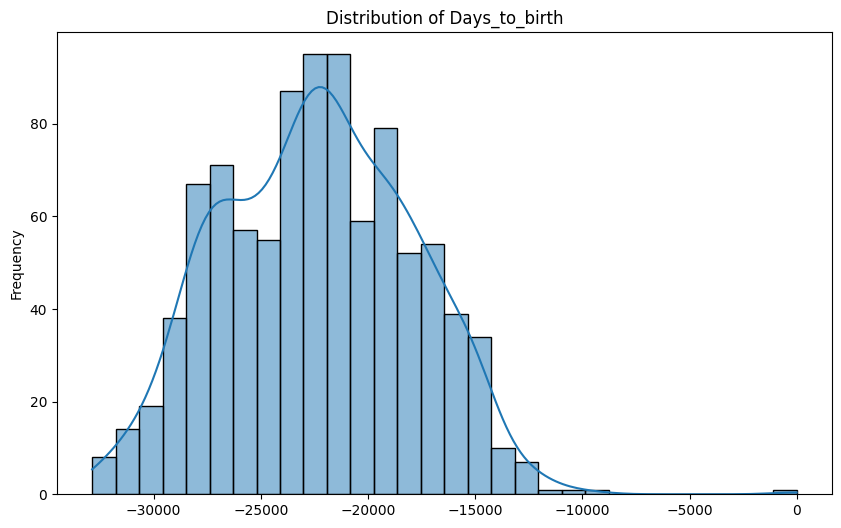

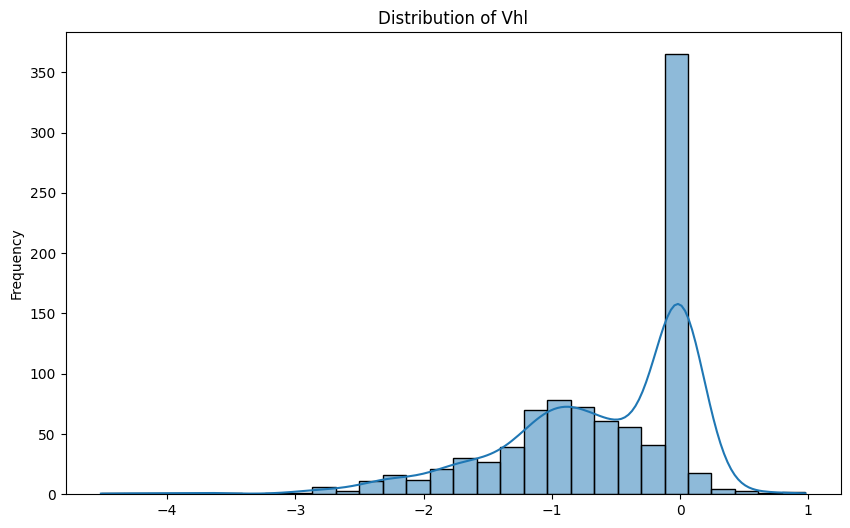

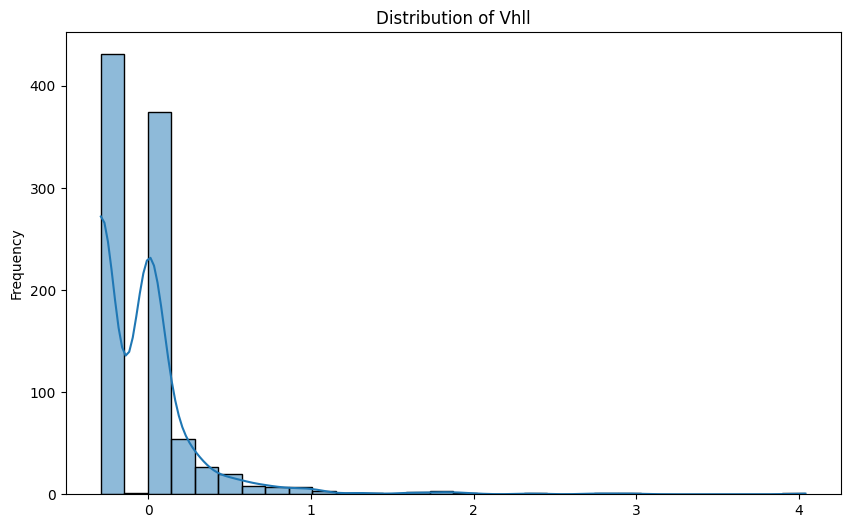

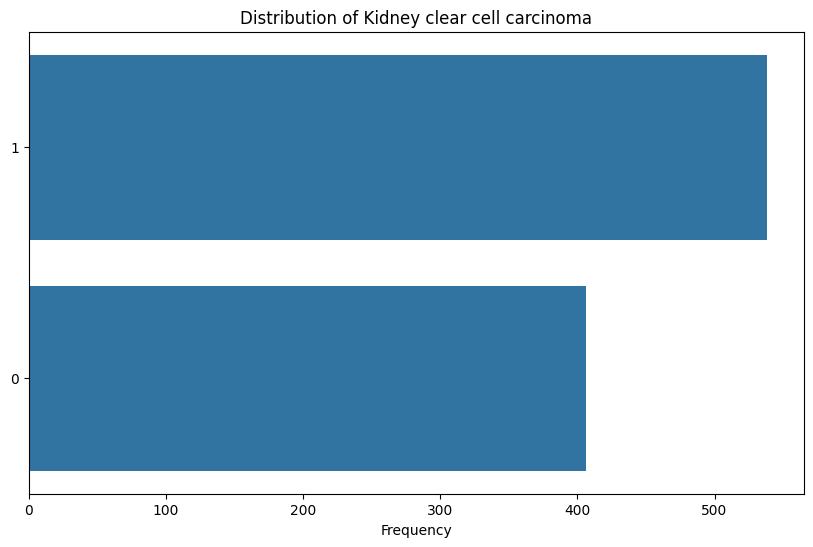

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

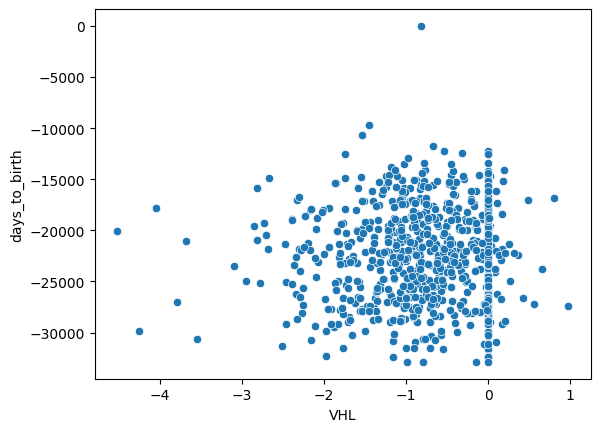

In [12]:
sns.scatterplot(data=merged_data, x='VHL', y=condition_col)
plt.show()

In [13]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney Clear Cell Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,69,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788,1
TCGA-6D-AA2E-01,68,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012,1
TCGA-A3-3306-01,67,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488,1
TCGA-A3-3306-11,67,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
TCGA-A3-3307-01,66,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588,1


In [14]:
merged_data.values

array([[ 6.90000000e+01,  3.87007530e-01,  8.12473664e-01, ...,
        -3.65332813e-02,  3.58787600e-01,  1.00000000e+00],
       [ 6.80000000e+01,  1.10680753e+00,  9.63573664e-01, ...,
         2.14246672e+00, -1.60123995e-02,  1.00000000e+00],
       [ 6.70000000e+01,  2.65307530e-01, -7.25226336e-01, ...,
        -2.87133281e-01,  2.66487600e-01,  1.00000000e+00],
       ...,
       [ 5.80000000e+01,  1.80050753e+00,  2.58073664e-01, ...,
         3.19506672e+00, -2.23912400e-01,  1.00000000e+00],
       [ 7.20000000e+01,  5.82207530e-01,  3.03173664e-01, ...,
         3.72566719e-01,  6.47876005e-02,  1.00000000e+00],
       [ 4.70000000e+01,  3.25007530e-01, -3.17952634e+00, ...,
        -1.37563328e+00, -1.98712400e-01,  1.00000000e+00]])

In [15]:
merged_data.dtypes

age                              int32
ARHGEF10L                      float64
HIF3A                          float64
RNF17                          float64
RNF10                          float64
                                ...   
BCL6B                          float64
GSTK1                          float64
SELP                           float64
SELS                           float64
Kidney Clear Cell Carcinoma      int64
Length: 20532, dtype: object

In [16]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_15708\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.5163082842915346


In [17]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [18]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For vhl:
VHL: Coefficient = 3.8364444354422114e-05, p-value = 0.999206518653388
VHLL: Coefficient = 0.01021469594094368, p-value = 0.6322438152203795

For age:
age: Coefficient = -0.004084853671201195, p-value = 0.5064060469148488



In [19]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between VHL gene and Kidney Clear Cell Carcinoma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the VHL gene and Kidney Clear Cell Carcinoma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the VHL gene and Kidney Clear Cell Carcinoma when considering the influence of age.




In [20]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: VHL
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: VHLL
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).




In [21]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: VHL
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the VHL gene and Kidney Clear Cell Carcinoma when considering the influence of age.

Variable: VHLL
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the VHLL gene and Kidney Clear Cell Carcinoma when considering the influence of age.


